In [1]:
!pip install six

In [1]:
import numpy as np
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six']=six
from sklearn import metrics

path='/content/drive/MyDrive/Internship/bank.csv'
df = pd.read_csv(path)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [2]:
from sklearn import preprocessing
string_to_int=preprocessing.LabelEncoder()
df=df.apply(string_to_int.fit_transform)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,0,19,0,255,0,0,0,3,0
11158,21,7,1,1,0,1149,0,0,2,15,6,81,3,0,0,3,0
11159,14,9,2,1,0,453,0,0,0,18,1,154,1,0,0,3,0
11160,25,9,1,1,0,424,0,1,0,7,8,7,1,155,5,0,0


In [3]:
feature_cols=['marital','education','loan']
X =df[feature_cols]
y = df.deposit

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.30)

from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion="entropy",random_state=100)
classifier.fit(X_train,y_train)



DecisionTreeClassifier(criterion='entropy', random_state=100)

In [4]:
y_pred =classifier.predict(X_test)
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p


,Actual,Predicted
641,1,1
1079,1,0
9813,0,0
5459,0,0
3794,1,0
...,...,...
8016,0,1
3562,1,1
4020,1,1
10661,0,0


In [5]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.5652433562257391


In [6]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1046  752]
 [ 704  847]]
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      1798
           1       0.53      0.55      0.54      1551

    accuracy                           0.57      3349
   macro avg       0.56      0.56      0.56      3349
weighted avg       0.57      0.57      0.57      3349



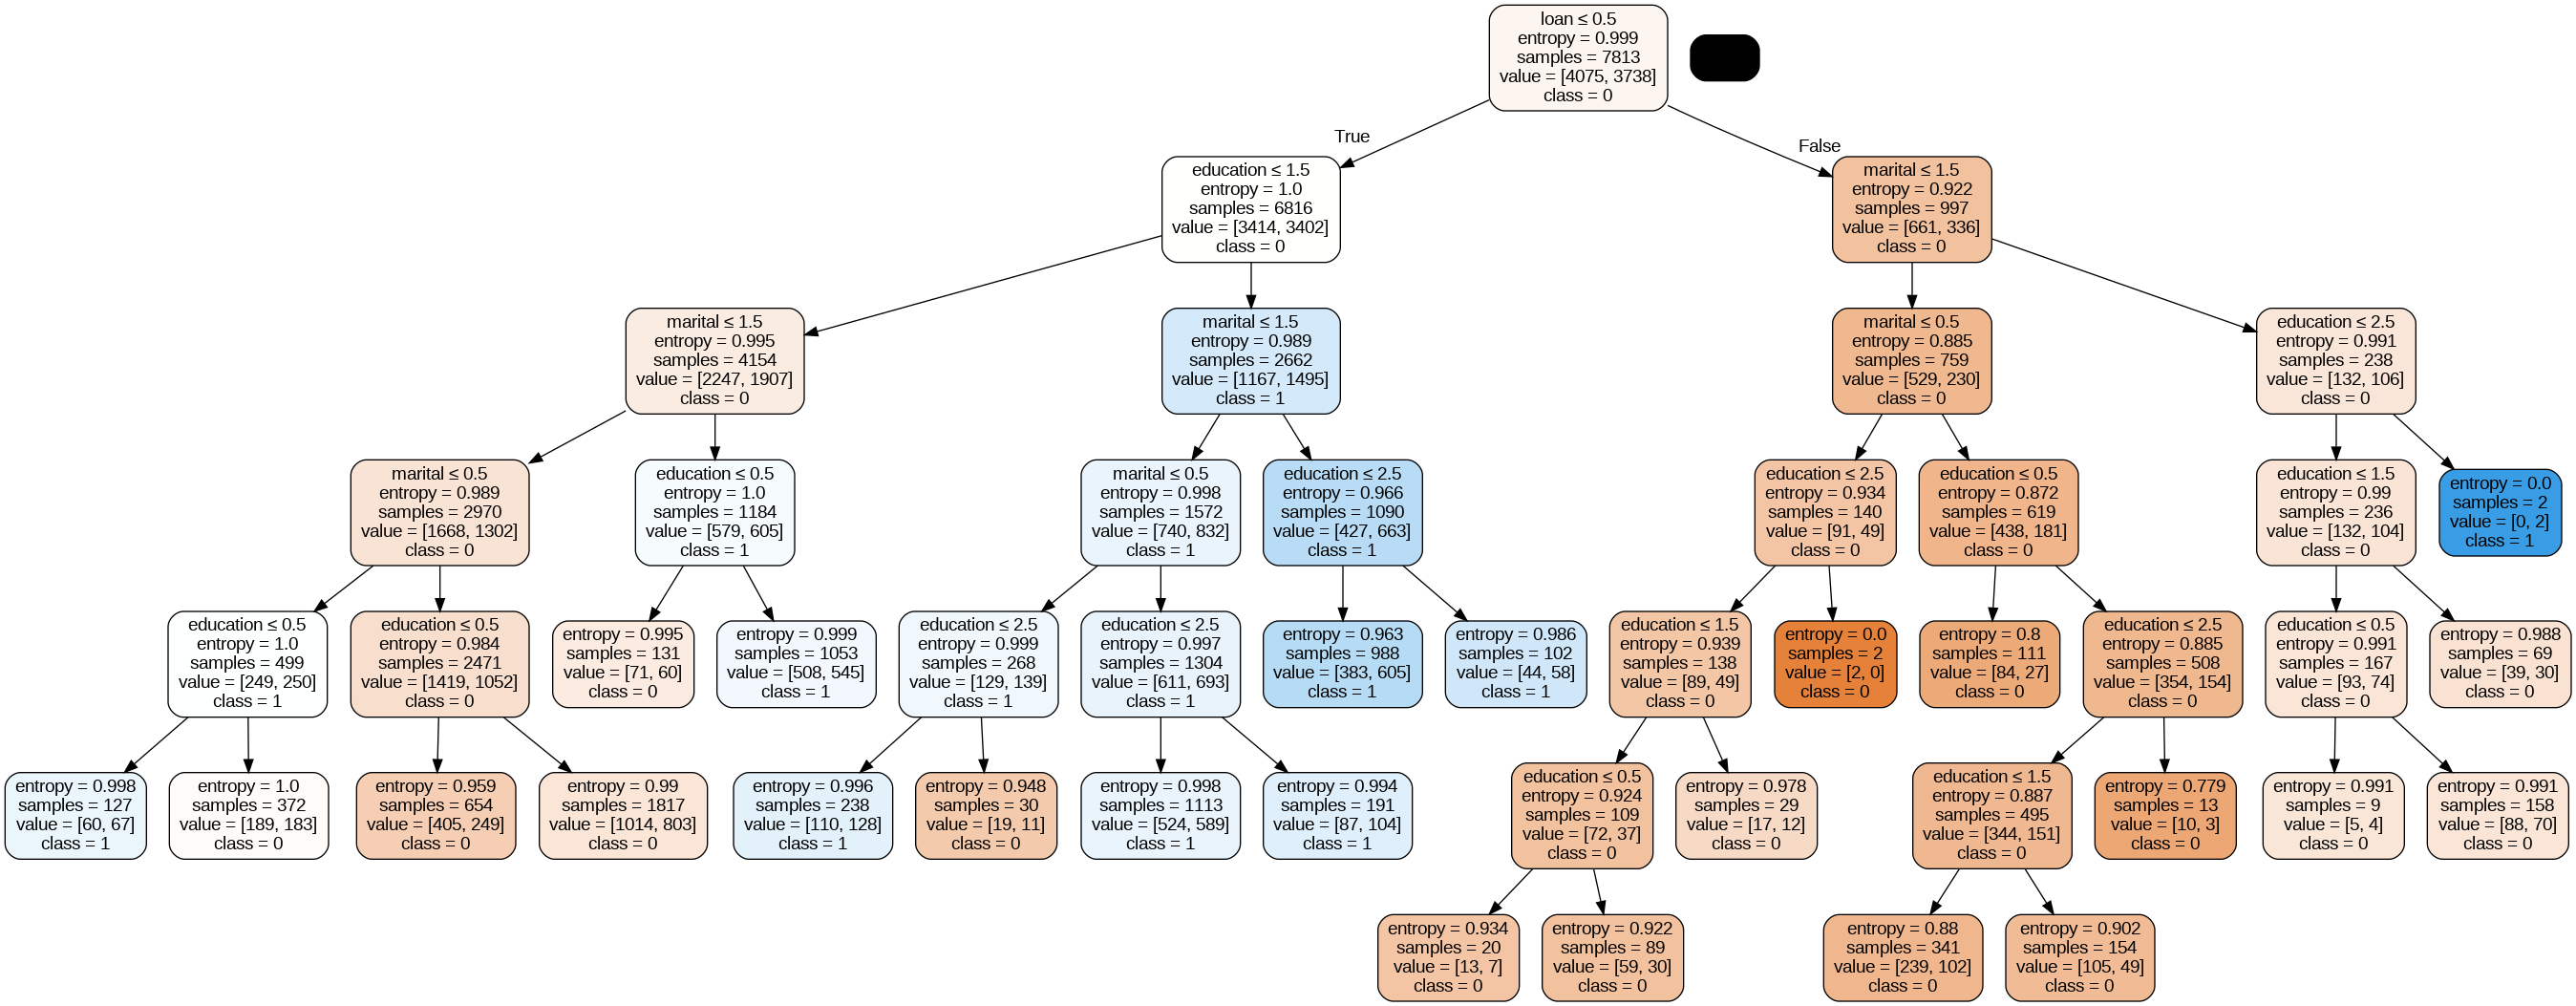

In [7]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bank.png')
Image(graph.create_png())